In [84]:
# Importar las librerías a utilizar para la exploración inicial de datos.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote

# Librerías para árboles de decisión
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, recall_score, accuracy_score, f1_score, roc_curve, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# Librerías para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from googletrans import Translator
from deep_translator import GoogleTranslator
from translate import Translator
from translatepy import Translator

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import warnings

# Hide future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:

# Levanto el CSV en un dataframe de pandas
Data = pd.read_csv('fraud_dataset.csv')

# muestro el head
print(Data.head())

   transaction_id transaction_amount     transaction_date transaction_type  \
0            1389              100.0  2024-01-23 20:39:32         in_store   
1           23946                NaN  2024-01-05 11:06:51           online   
2            8296             1000.0  2024-01-14 13:36:11           online   
3           28145   836.010919100131  2024-01-26 03:15:20       withdrawal   
4           14861  54.17990548903373  2024-01-23 20:02:05         in_store   

  merchant_location currency  merchant_id merchant_category payment_method  \
0        Lake Donna      EUR        96971       electronics    contactless   
1    West Kariburgh      usd        88047       restaurants    contactless   
2     East Kimberly      USD        88312         groceries           chip   
3       Janeborough      USD        92701       Electronics           chip   
4  Lake Jessicaberg      EUR        89010       Electronics    contactless   

   customer_id  customer_age customer_gender  purchase_history

In [4]:
Data.shape

(20043, 20)

In [5]:
# Listas las columnas disponibles
print('Las columnas disponibles en el dataset son:')
Data.columns

Las columnas disponibles en el dataset son:


Index(['transaction_id', 'transaction_amount', 'transaction_date',
       'transaction_type', 'merchant_location', 'currency', 'merchant_id',
       'merchant_category', 'payment_method', 'customer_id', 'customer_age',
       'customer_gender', 'purchase_history', 'monthly_spending_avg',
       'credit_limit', 'current_balance', 'ip_address', 'device_used',
       'transaction_frequency', 'is_fraud'],
      dtype='object')

In [6]:
#Analizo el data frame para ver detalles de las columnas.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         20043 non-null  int64  
 1   transaction_amount     17643 non-null  object 
 2   transaction_date       20043 non-null  object 
 3   transaction_type       19184 non-null  object 
 4   merchant_location      18416 non-null  object 
 5   currency               20043 non-null  object 
 6   merchant_id            20043 non-null  int64  
 7   merchant_category      20043 non-null  object 
 8   payment_method         20043 non-null  object 
 9   customer_id            20043 non-null  int64  
 10  customer_age           17269 non-null  float64
 11  customer_gender        20043 non-null  object 
 12  purchase_history       20043 non-null  int64  
 13  monthly_spending_avg   20043 non-null  float64
 14  credit_limit           20043 non-null  int64  
 15  cu

In [7]:
#Analizo el data frame para ver detalles de las columnas.
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20043.0,14179.676446,8129.766588,1.00,7237.0000,14112.00,21191.00,28348.00
merchant_id,20043.0,54819.700145,25798.856764,10012.00,32732.5000,54988.00,77034.00,99992.00
customer_id,20043.0,5490.219428,2574.488135,1000.00,3250.0000,5476.00,7700.00,9995.00
customer_age,17269.0,34.564074,9.621739,18.00,28.0000,34.00,41.00,70.00
purchase_history,20043.0,10.031333,3.189569,1.00,8.0000,10.00,12.00,24.00
monthly_spending_avg,20043.0,457.083912,243.452705,79.52,287.0400,404.70,566.34,2403.47
credit_limit,20043.0,10542.628998,5491.340585,1000.00,5735.0000,10606.00,15309.00,19998.00
current_balance,17976.0,9980.538925,5796.872456,2.87,4950.4425,9902.61,14977.87,19999.79
transaction_frequency,20043.0,5.039715,2.265181,0.00,3.0000,5.00,6.00,16.00
is_fraud,20043.0,0.303298,0.459694,0.00,0.0000,0.00,1.00,1.00


In [8]:
#Analizo el data frame para ver detalles de las columnas.
Data.describe(include=['object']).T

,count,unique,top,freq
transaction_amount,17643,7123,2000.0,1078
transaction_date,20043,19814,2024-01-08 04:10:40,3
transaction_type,19184,3,online,11330
merchant_location,18416,8115,West Michael,27
currency,20043,6,USD,12300
merchant_category,20043,6,electronics,7420
payment_method,20043,3,chip,10134
customer_gender,20043,4,Male,11039
ip_address,20043,11340,91.105.128.117,4
device_used,20043,5,mobile,12910


In [9]:
#Analizo el data frame para ver samples de las columnas.
Data.sample(15)

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,customer_age,customer_gender,purchase_history,monthly_spending_avg,credit_limit,current_balance,ip_address,device_used,transaction_frequency,is_fraud
17480,15492,1500.0,2024-03-06 18:43:11,online,Oliverton,GBP,55539,electro,chip,7800,35.0,Male,6,444.10,7092,6226.77,9.180.10.128,desktop,5,1
10721,25405,2509.3971557698305,2024-01-23 15:22:32,in_store,West Debbie,USD,74233,electronics,chip,3836,26.0,Male,9,544.81,12002,6567.15,53.161.176.204,mobile,7,0
5441,25465,919.0918369029556,2024-01-21 12:39:35,NaN,Deborahbury,USD,45264,travel,chip,4602,37.0,Female,2,349.38,19825,NaN,68.70.229.147,mobile,6,0
15792,12742,5612.58607655044,2024-02-02 01:35:01,in_store,North Zacharyburgh,GBP,30159,restaurants,contactless,5079,57.0,Female,10,308.68,15997,10291.21,183.213.41.92,mobile,5,0
10603,5023,100.0,2024-01-01 05:02:56,online,Lake Heather,USD,49074,electronics,magnetic_stripe,7385,26.0,Female,9,255.92,12533,3379.98,222.133.62.253,desktop,1,1
15707,28298,$500.0,2024-02-16 19:29:54,online,Port Michaelstad,EUR,71430,electronics,chip,8029,53.0,Male,9,373.83,8356,19891.15,90.161.6.74,mobile,5,1
2159,10793,NaN,2024-01-13 22:39:06,online,West Jean,USD,16877,groceries,chip,3410,18.0,Male,8,922.84,8973,12693.39,10.29.239.32,mobile,3,0
15325,27907,NaN,2024-02-21 04:49:22,in_store,Reyeston,USD,18847,restaurants,chip,3650,22.0,Male,10,505.69,16194,6822.56,121.174.203.87,mobile,6,0
9347,9576,516.33687282322,2024-01-18 02:32:03,online,Ashleyton,EUR,92891,travel,chip,8429,26.0,Female,9,713.53,19070,9624.22,70.118.212.152,mobile,7,0
5440,13884,1000.0,2024-01-04 06:16:32,online,Gainesville,USD,69524,electronics,contactless,6189,38.0,Female,13,251.84,4471,NaN,100.164.20.13,mobile,10,1


In [10]:
# Valores unicos de las variables categoricas
Data.select_dtypes(include=['object']).apply(pd.unique)

transaction_amount    [100.0, nan, 1000.0, 836.010919100131, 54.1799...
transaction_date      [2024-01-23 20:39:32, 2024-01-05 11:06:51, 202...
transaction_type                    [in_store, online, withdrawal, nan]
merchant_location     [Lake Donna, West Kariburgh, East Kimberly, Ja...
currency                                  [EUR, usd, USD, US, GBP, gbp]
merchant_category     [electronics, restaurants, groceries, Electron...
payment_method                     [contactless, chip, magnetic_stripe]
customer_gender                               [Female, Male, FEMALE, M]
ip_address            [67.20.93.223, 182.126.136.76, 179.9.25.40, 12...
device_used                       [mobile, desktop, Phone, TAB, tablet]
dtype: object

Amount no puede ser object convertir a float
limpiar currency, category, gender, device


## Limpieza de datos

In [11]:
#Verifico si tengo algun NaN
has_nans = Data.isna().any().any()

check = "Yes" if has_nans else "No"


# Printeo el resultado del analiss
print(f"Hay Algun 'Nan' en el DataFrame? {check}")

Hay Algun 'Nan' en el DataFrame? Yes


In [12]:
Data.isnull().sum()

transaction_id              0
transaction_amount       2400
transaction_date            0
transaction_type          859
merchant_location        1627
currency                    0
merchant_id                 0
merchant_category           0
payment_method              0
customer_id                 0
customer_age             2774
customer_gender             0
purchase_history            0
monthly_spending_avg        0
credit_limit                0
current_balance          2067
ip_address                  0
device_used                 0
transaction_frequency       0
is_fraud                    0
dtype: int64

drop transaction amount NAN
merchant location NA
transaction type moda
customer age media
current balance mediana

In [13]:
print(Data['transaction_amount'].infer_objects()[:30])

0                  100.0
1                    NaN
2                 1000.0
3       836.010919100131
4      54.17990548903373
5                    NaN
6      8495.724782070563
7                 1500.0
8     484.11935235848694
9                    NaN
10     48.19812386589951
11     49465.67083529911
12                1000.0
13    2834.2146396139565
14    2158.1426065143664
15                 500.0
16     210.0801520941389
17    38.555796849945644
18      629.589373453229
19    1413.1399962719536
20    1800.9110408730094
21     768.5230970456101
22     1119.944543561217
23     459.3124005312254
24      364.829420229356
25     775.2819324018697
26     28.06393370595047
27     483.5197032861713
28                   NaN
29    43.266496611752515
Name: transaction_amount, dtype: object


In [14]:
import re
# Función para detectar valores no numéricos
def es_numerico(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False
# Filtrar valores no numéricos
valores_no_numericos = Data[~Data['transaction_amount'].apply(es_numerico)]
print(valores_no_numericos[['transaction_id', 'transaction_amount']])

       transaction_id   transaction_amount
50               8159   $54.34792829773312
60               4297  $249.49590398254773
111             20466  $1132.5203060067183
244             16115              $1000.0
256              3940   $252.7755136329105
...               ...                  ...
19880            4985              $1500.0
19896           28140  $1152.6162797425534
19950            8058    $1021.57909656008
19952           23471  $1152.6533614273108
20035            4740  $1899.9277517223065

[437 rows x 2 columns]


In [15]:
Data['transaction_amount'] = Data['transaction_amount'].astype(str).str.replace('$', '', regex=False)


In [16]:
Data['transaction_amount'] = pd.to_numeric(Data['transaction_amount'], errors='coerce')

In [17]:
import re
# Función para detectar valores no numéricos
def es_numerico(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False
# Filtrar valores no numéricos
valores_no_numericos = Data[~Data['transaction_amount'].apply(es_numerico)]
print(valores_no_numericos[['transaction_id', 'transaction_amount']])

Empty DataFrame
Columns: [transaction_id, transaction_amount]
Index: []


In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         20043 non-null  int64  
 1   transaction_amount     17594 non-null  float64
 2   transaction_date       20043 non-null  object 
 3   transaction_type       19184 non-null  object 
 4   merchant_location      18416 non-null  object 
 5   currency               20043 non-null  object 
 6   merchant_id            20043 non-null  int64  
 7   merchant_category      20043 non-null  object 
 8   payment_method         20043 non-null  object 
 9   customer_id            20043 non-null  int64  
 10  customer_age           17269 non-null  float64
 11  customer_gender        20043 non-null  object 
 12  purchase_history       20043 non-null  int64  
 13  monthly_spending_avg   20043 non-null  float64
 14  credit_limit           20043 non-null  int64  
 15  cu

In [19]:
Data

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,customer_age,customer_gender,purchase_history,monthly_spending_avg,credit_limit,current_balance,ip_address,device_used,transaction_frequency,is_fraud
0,1389,100.000000,2024-01-23 20:39:32,in_store,Lake Donna,EUR,96971,electronics,contactless,5205,44.0,Female,8,412.01,13047,1956.78,67.20.93.223,mobile,2,1
1,23946,NaN,2024-01-05 11:06:51,online,West Kariburgh,usd,88047,restaurants,contactless,3035,55.0,Male,5,928.38,9140,19716.77,182.126.136.76,mobile,5,0
2,8296,1000.000000,2024-01-14 13:36:11,online,East Kimberly,USD,88312,groceries,chip,9982,50.0,Female,14,358.88,2724,6749.39,179.9.25.40,desktop,7,1
3,28145,836.010919,2024-01-26 03:15:20,withdrawal,Janeborough,USD,92701,Electronics,chip,5327,NaN,Female,6,236.92,7267,6945.33,129.174.89.31,mobile,2,0
4,14861,54.179905,2024-01-23 20:02:05,in_store,Lake Jessicaberg,EUR,89010,Electronics,contactless,3078,35.0,Male,9,258.80,17564,18247.69,26.125.0.149,mobile,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,18319,100.000000,2024-01-19 09:57:16,in_store,Hamiltonbury,EUR,81303,restaurants,chip,9346,45.0,Male,9,267.39,18241,4256.42,44.112.236.50,mobile,7,1
20039,15534,1009.024880,2024-03-25 18:10:12,withdrawal,Jessicastad,EUR,41055,electronics,contactless,7173,34.0,Male,11,494.13,18183,850.84,182.72.76.44,Phone,4,0
20040,21150,798.448044,2024-03-02 20:09:21,online,East Lauraburgh,USD,99623,restaurants,contactless,3337,29.0,Male,16,366.29,15353,6886.97,16.243.227.134,mobile,4,0
20041,13954,1304.166557,2024-01-10 00:18:45,online,North Anna,USD,10676,electronics,contactless,5505,31.0,Female,12,657.12,19529,10285.00,154.95.171.87,mobile,4,0


In [20]:
Data = Data.dropna(subset=['transaction_amount'])
Data['merchant_location'] = Data['merchant_location'].fillna('NA')
transaction_type_moda = Data['transaction_type'].mode()[0]
Data['transaction_type'] = Data['transaction_type'].fillna(transaction_type_moda)
customer_age_media = Data['customer_age'].mean()
Data['customer_age'] = Data['customer_age'].fillna(customer_age_media)
current_balance_mediana = Data['current_balance'].median()
Data['current_balance'] = Data['current_balance'].fillna(current_balance_mediana)

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\777432397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['merchant_location'] = Data['merchant_location'].fillna('NA')
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\777432397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['transaction_type'] = Data['transaction_type'].fillna(transaction_type_moda)
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\777432397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [21]:
Data.duplicated().sum()

176

In [22]:
Data.drop_duplicates(inplace=True)

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\234339930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop_duplicates(inplace=True)


In [23]:
Data.duplicated().sum()

0

In [24]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'merchant_location', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]
# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = Data[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'transaction_type': ['in_store' 'online' 'withdrawal']
Valores únicos en 'merchant_location': ['Lake Donna' 'East Kimberly' 'Janeborough' ... 'Port Connorbury'
 'Beckfort' 'Olsonburgh']
Valores únicos en 'currency': ['EUR' 'USD' 'GBP' 'gbp' 'US' 'usd']
Valores únicos en 'merchant_category': ['electronics' 'groceries' 'Electronics' 'restaurants' 'travel' 'electro']
Valores únicos en 'payment_method': ['contactless' 'chip' 'magnetic_stripe']
Valores únicos en 'customer_gender': ['Female' 'Male' 'M' 'FEMALE']
Valores únicos en 'device_used': ['mobile' 'desktop' 'Phone' 'TAB' 'tablet']


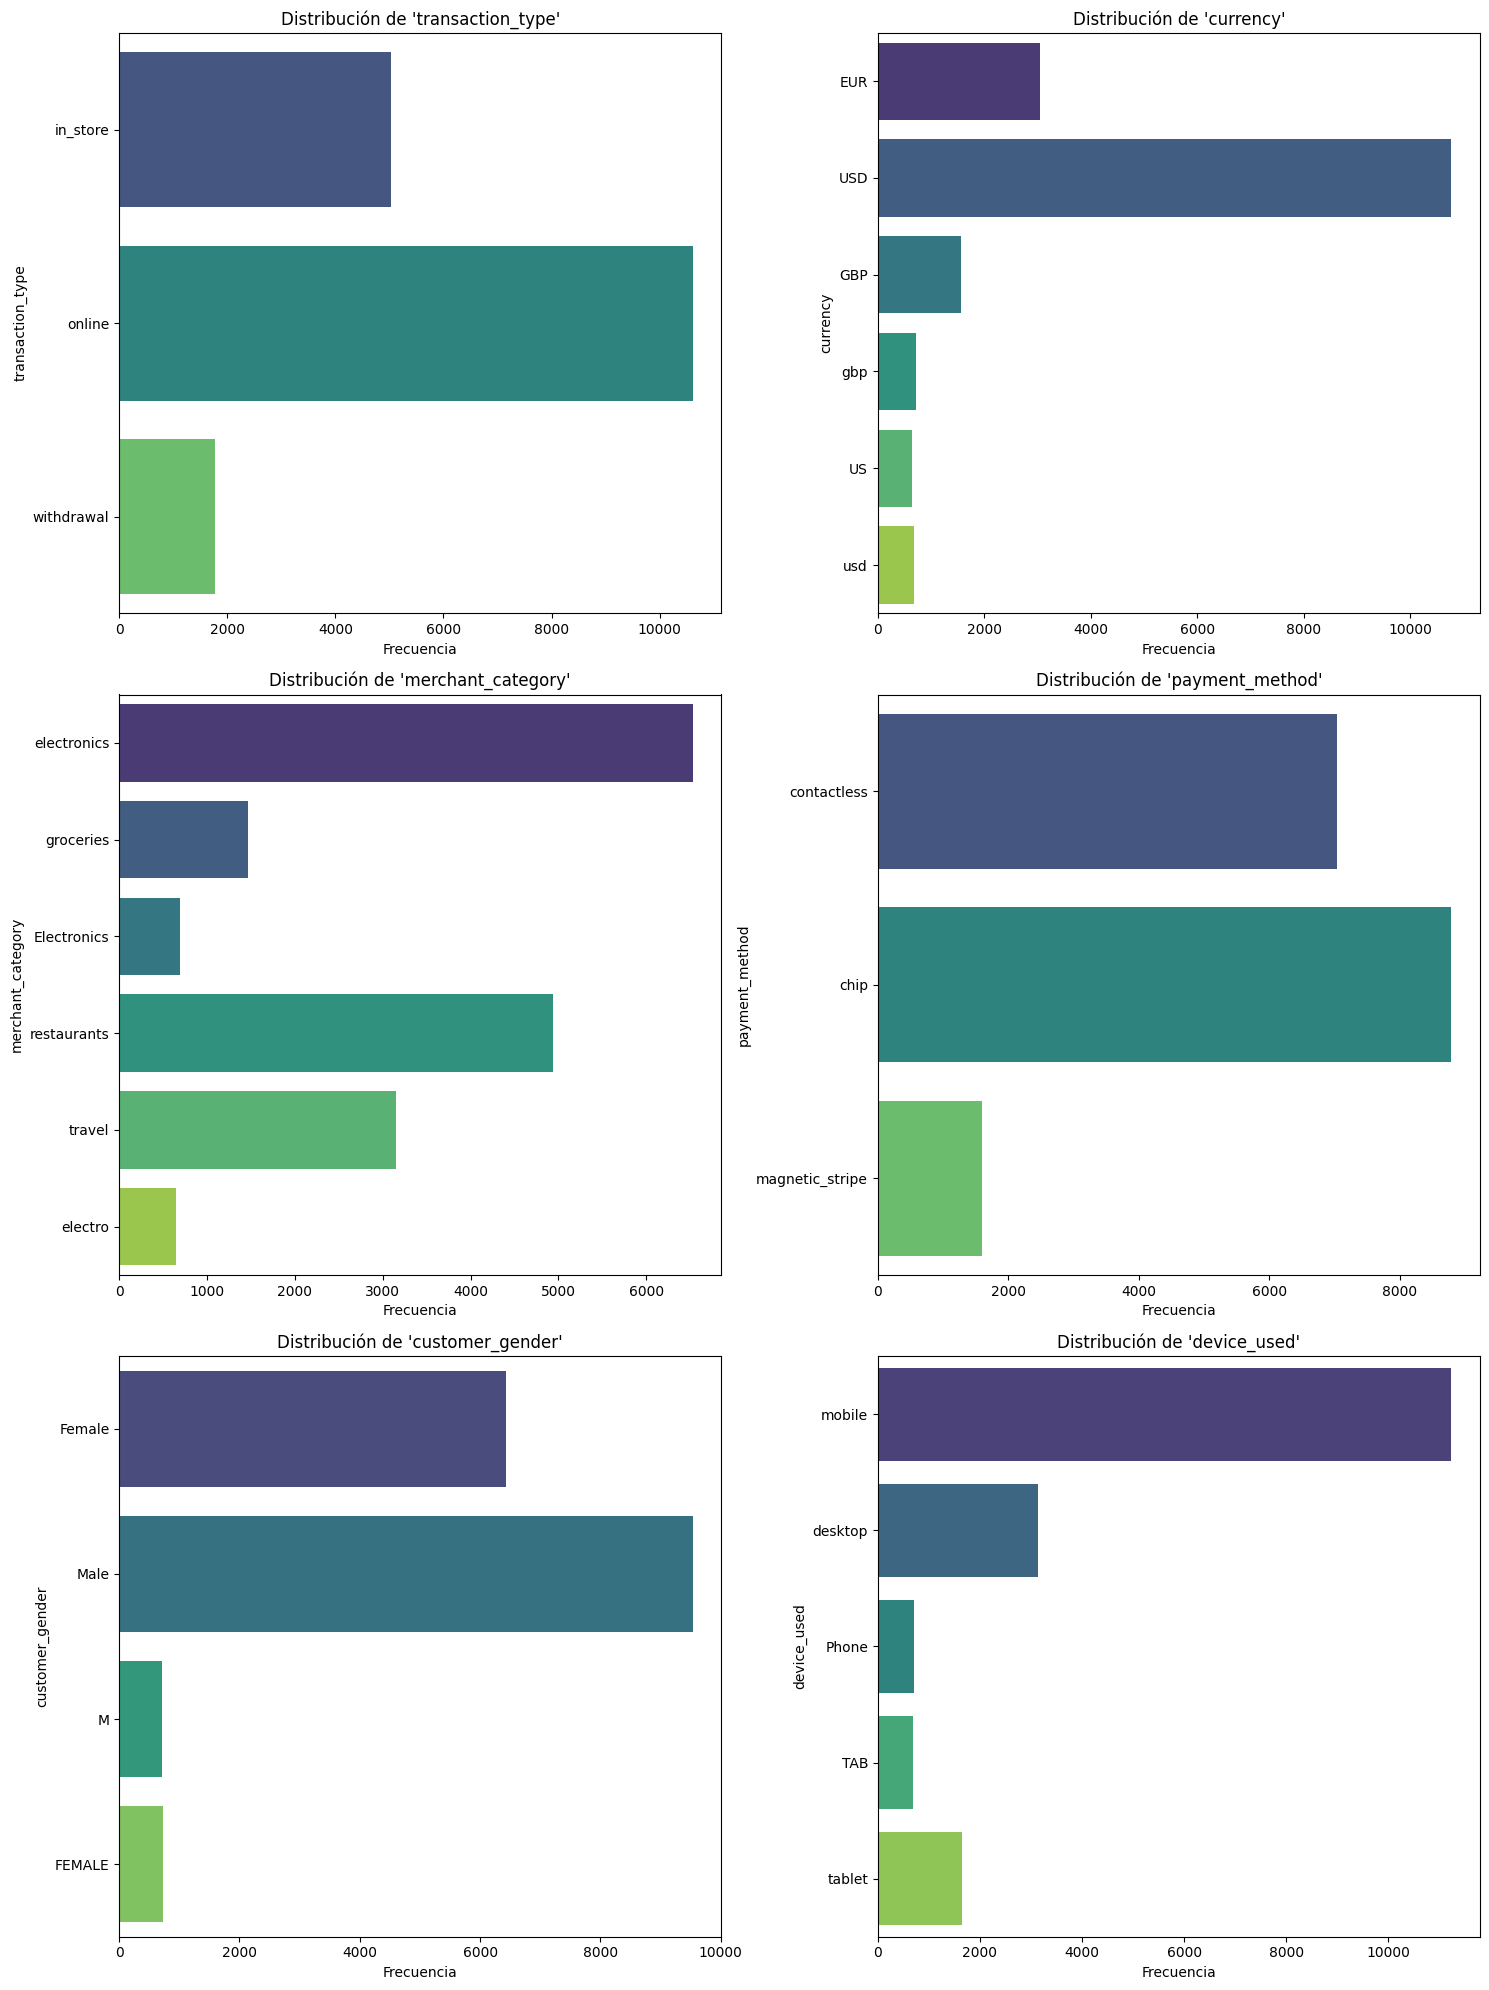

In [25]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()
# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribución de '{columna}'")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel(columna)
plt.tight_layout()
plt.show()

In [26]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'merchant_location', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]
# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = Data[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'transaction_type': ['in_store' 'online' 'withdrawal']
Valores únicos en 'merchant_location': ['Lake Donna' 'East Kimberly' 'Janeborough' ... 'Port Connorbury'
 'Beckfort' 'Olsonburgh']
Valores únicos en 'currency': ['EUR' 'USD' 'GBP' 'gbp' 'US' 'usd']
Valores únicos en 'merchant_category': ['electronics' 'groceries' 'Electronics' 'restaurants' 'travel' 'electro']
Valores únicos en 'payment_method': ['contactless' 'chip' 'magnetic_stripe']
Valores únicos en 'customer_gender': ['Female' 'Male' 'M' 'FEMALE']
Valores únicos en 'device_used': ['mobile' 'desktop' 'Phone' 'TAB' 'tablet']


In [27]:
# Normalizar 'currency' (convertir a mayúsculas y unificar 'US' a 'USD')
Data['currency'] = Data['currency'].str.upper()
Data['currency'] = Data['currency'].replace({'US': 'USD'})


C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\4195471397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['currency'] = Data['currency'].str.upper()
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\4195471397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['currency'] = Data['currency'].replace({'US': 'USD'})


In [28]:
# Normalizar 'Gender' (convertir a mayúsculas y unificar 'M' a 'Male')
Data['customer_gender'] = Data['customer_gender'].str.lower()
Data['customer_gender'] = Data['customer_gender'].replace({'m': 'male'})



C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\233187557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['customer_gender'] = Data['customer_gender'].str.lower()
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\233187557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['customer_gender'] = Data['customer_gender'].replace({'m': 'male'})


In [29]:
# Normalizar 'Merchant Category' (convertir a mayúsculas y unificar 'Electro' a 'Electronics')
Data['merchant_category'] = Data['merchant_category'].str.lower()
Data['merchant_category'] = Data['merchant_category'].replace('electro', 'electronics')

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3861059285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['merchant_category'] = Data['merchant_category'].str.lower()
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3861059285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['merchant_category'] = Data['merchant_category'].replace('electro', 'electronics')


In [30]:
# Normalizar 'device_used' (convertir a mayúsculas y unificar 'US' a 'USD')
Data['device_used'] = Data['device_used'].str.lower()
Data['device_used'] = Data['device_used'].replace('phone', 'mobile')
Data['device_used'] = Data['device_used'].replace('tab', 'tablet')

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3126099526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['device_used'] = Data['device_used'].str.lower()
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3126099526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['device_used'] = Data['device_used'].replace('phone', 'mobile')
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3126099526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

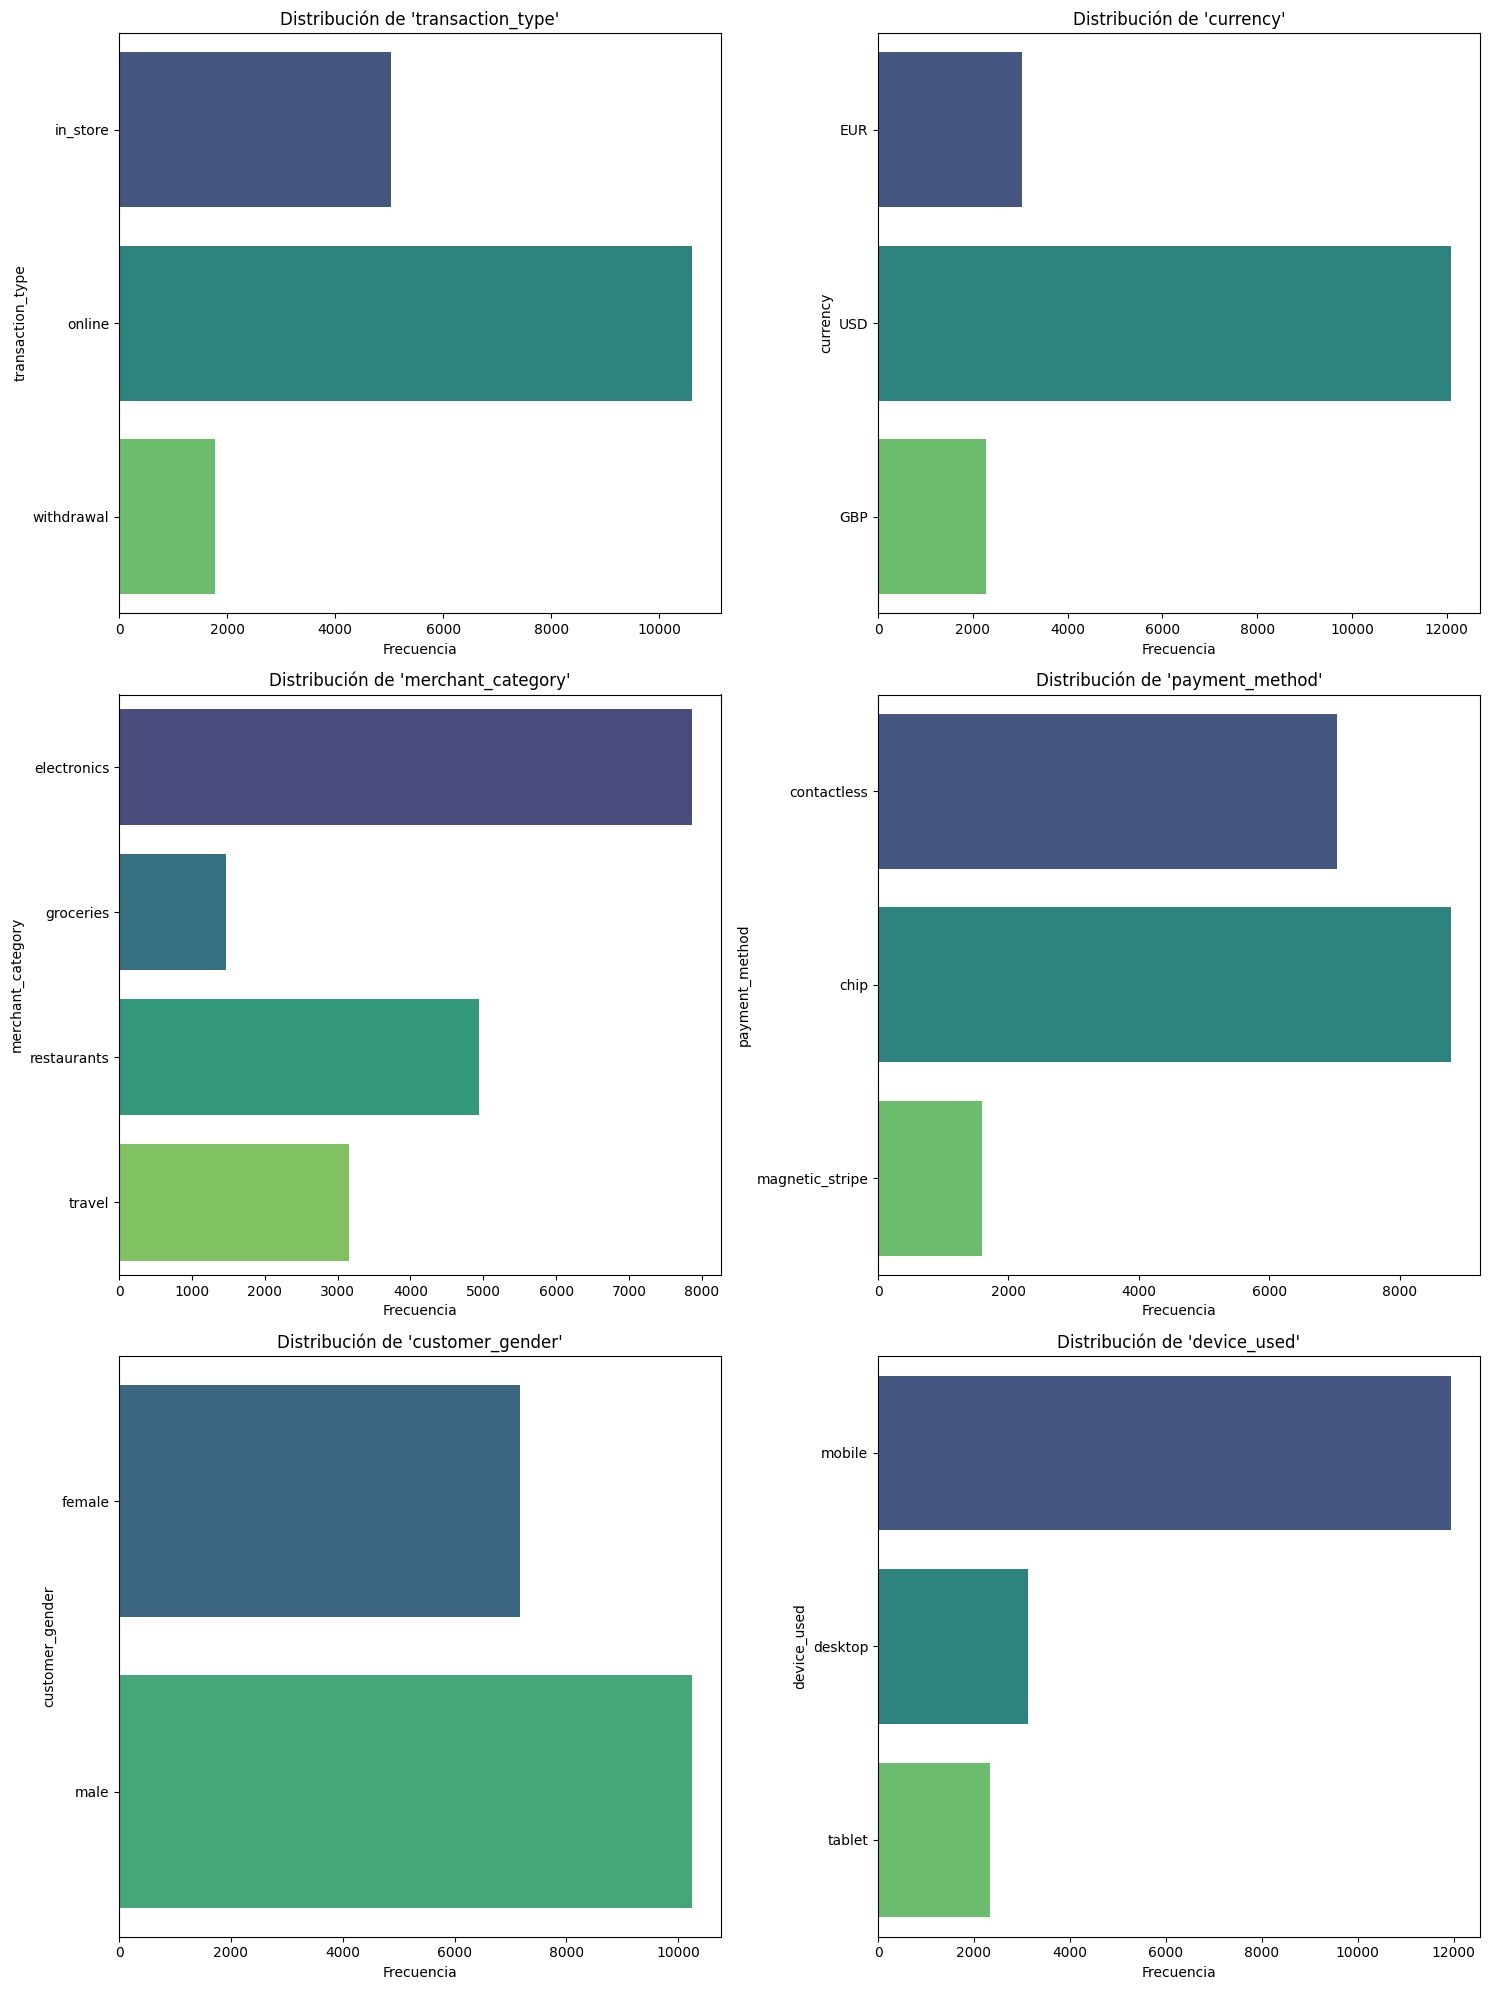

In [31]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()
# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribución de '{columna}'")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel(columna)
plt.tight_layout()
plt.show()

In [32]:
# Columnas numéricas a analizar
columnas_numericas = [
   'customer_age', 'monthly_spending_avg',
   'credit_limit', 'current_balance', 'transaction_frequency'
]

In [33]:
# Función para identificar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers
# Identificar outliers en cada columna numérica
for columna in columnas_numericas:
    outliers = detectar_outliers(Data[columna])
    print(f"Número de outliers segun IQR en '{columna}': {len(outliers)}")
    print(f"Outliers en '{columna}': {outliers.values}\n")

Número de outliers segun IQR en 'customer_age': 206
Outliers en 'customer_age': [63. 65. 66. 63. 58. 58. 67. 57. 64. 58. 67. 59. 60. 57. 59. 60. 61. 70.
 66. 58. 58. 58. 63. 58. 57. 58. 69. 57. 62. 62. 64. 61. 57. 59. 58. 60.
 64. 58. 57. 62. 57. 61. 60. 66. 57. 60. 58. 57. 67. 61. 62. 58. 57. 58.
 57. 67. 57. 63. 60. 68. 64. 57. 63. 60. 57. 70. 59. 60. 58. 57. 57. 60.
 58. 59. 58. 62. 65. 58. 63. 58. 59. 59. 57. 59. 57. 59. 57. 59. 57. 60.
 57. 57. 60. 57. 63. 57. 61. 63. 60. 58. 58. 63. 57. 58. 57. 67. 63. 57.
 59. 58. 68. 61. 59. 57. 68. 57. 61. 57. 59. 59. 57. 63. 62. 57. 63. 65.
 66. 63. 58. 58. 67. 57. 64. 58. 67. 59. 60. 57. 59. 60. 61. 70. 66. 58.
 58. 58. 63. 58. 57. 58. 69. 57. 62. 62. 64. 61. 57. 59. 58. 60. 64. 58.
 57. 62. 57. 61. 60. 66. 57. 60. 58. 57. 67. 61. 62. 58. 57. 58. 57. 63.
 65. 66. 63. 58. 58. 67. 57. 64. 58. 67. 59. 60. 57. 59. 60. 61. 70. 66.
 58. 58. 58. 63. 58. 57. 58. 69.]

Número de outliers segun IQR en 'monthly_spending_avg': 685
Outliers en 'monthly_s

In [34]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 0 to 19843
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         17418 non-null  int64  
 1   transaction_amount     17418 non-null  float64
 2   transaction_date       17418 non-null  object 
 3   transaction_type       17418 non-null  object 
 4   merchant_location      17418 non-null  object 
 5   currency               17418 non-null  object 
 6   merchant_id            17418 non-null  int64  
 7   merchant_category      17418 non-null  object 
 8   payment_method         17418 non-null  object 
 9   customer_id            17418 non-null  int64  
 10  customer_age           17418 non-null  float64
 11  customer_gender        17418 non-null  object 
 12  purchase_history       17418 non-null  int64  
 13  monthly_spending_avg   17418 non-null  float64
 14  credit_limit           17418 non-null  int64  
 15  current

In [35]:
# Convertir la columna 'transaction_date' a tipo datetime
Data['transaction_date'] = pd.to_datetime(Data['transaction_date'])
# Extraer componentes de la fecha
Data['transaction_year'] = Data['transaction_date'].dt.year
Data['transaction_month'] = Data['transaction_date'].dt.month
Data['transaction_day'] = Data['transaction_date'].dt.day
Data['transaction_hour'] = Data['transaction_date'].dt.hour
Data['transaction_minute'] = Data['transaction_date'].dt.minute
Data['transaction_dayofweek'] = Data['transaction_date'].dt.dayofweek  # Día de la semana (0 = Lunes, 6 = Domingo)
# Mostrar las primeras filas para verificar
Data[['transaction_date', 'transaction_year', 'transaction_month', 'transaction_day',
    'transaction_hour', 'transaction_minute', 'transaction_dayofweek']].head()

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\2049970758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['transaction_date'] = pd.to_datetime(Data['transaction_date'])
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\2049970758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['transaction_year'] = Data['transaction_date'].dt.year
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\2049970758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_dayofweek
0,2024-01-23 20:39:32,2024,1,23,20,39,1
2,2024-01-14 13:36:11,2024,1,14,13,36,6
3,2024-01-26 03:15:20,2024,1,26,3,15,4
4,2024-01-23 20:02:05,2024,1,23,20,2,1
6,2024-01-13 09:44:03,2024,1,13,9,44,5


In [36]:
Data.head(10)

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,...,ip_address,device_used,transaction_frequency,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_dayofweek
0,1389,100.000000,2024-01-23 20:39:32,in_store,Lake Donna,EUR,96971,electronics,contactless,5205,...,67.20.93.223,mobile,2,1,2024,1,23,20,39,1
2,8296,1000.000000,2024-01-14 13:36:11,online,East Kimberly,USD,88312,groceries,chip,9982,...,179.9.25.40,desktop,7,1,2024,1,14,13,36,6
3,28145,836.010919,2024-01-26 03:15:20,withdrawal,Janeborough,USD,92701,electronics,chip,5327,...,129.174.89.31,mobile,2,0,2024,1,26,3,15,4
4,14861,54.179905,2024-01-23 20:02:05,in_store,Lake Jessicaberg,EUR,89010,electronics,contactless,3078,...,26.125.0.149,mobile,5,0,2024,1,23,20,2,1
6,4851,8495.724782,2024-01-13 09:44:03,in_store,Jonesview,GBP,32060,restaurants,chip,9073,...,10.196.60.192,desktop,4,0,2024,1,13,9,44,5
7,853,1500.000000,2024-01-12 00:39:20,online,Palmerland,USD,39059,restaurants,chip,5475,...,8.162.129.196,desktop,3,1,2024,1,12,0,39,4
8,25874,484.119352,2024-01-08 23:10:10,online,NA,GBP,72787,electronics,chip,2815,...,88.233.109.150,mobile,5,0,2024,1,8,23,10,0
10,18836,48.198124,2024-01-12 17:43:24,online,West Scottfort,GBP,81719,restaurants,chip,6629,...,161.149.73.232,mobile,6,0,2024,1,12,17,43,4
11,27562,49465.670835,2024-01-07 03:46:36,online,East Justin,USD,64036,travel,contactless,7789,...,186.128.147.219,tablet,2,0,2024,1,7,3,46,6
12,20089,1000.000000,2024-01-25 03:01:52,online,Teresahaven,USD,65127,groceries,contactless,3266,...,51.35.39.103,mobile,4,1,2024,1,25,3,1,3


In [37]:
Data.info

<bound method DataFrame.info of        transaction_id  transaction_amount    transaction_date  \
0                1389          100.000000 2024-01-23 20:39:32   
2                8296         1000.000000 2024-01-14 13:36:11   
3               28145          836.010919 2024-01-26 03:15:20   
4               14861           54.179905 2024-01-23 20:02:05   
6                4851         8495.724782 2024-01-13 09:44:03   
...               ...                 ...                 ...   
19839           20862         1500.000000 2024-03-30 15:19:33   
19840           19420          686.167824 2024-03-12 00:12:32   
19841            5333         2158.867501 2024-03-05 06:46:24   
19842           25243         1626.103800 2024-03-13 03:45:18   
19843           25650          929.815878 2024-03-02 04:10:40   

      transaction_type merchant_location currency  merchant_id  \
0             in_store        Lake Donna      EUR        96971   
2               online     East Kimberly      USD      

In [38]:
Data[['ip1', 'ip2', 'ip3', 'ip4']] = Data['ip_address'].str.split('.', expand=True).astype('Int64')
Data[['ip1', 'ip2', 'ip3', 'ip4']].head()

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3169872120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[['ip1', 'ip2', 'ip3', 'ip4']] = Data['ip_address'].str.split('.', expand=True).astype('Int64')
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3169872120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[['ip1', 'ip2', 'ip3', 'ip4']] = Data['ip_address'].str.split('.', expand=True).astype('Int64')
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\3169872120.py:1: SettingWithCo

,ip1,ip2,ip3,ip4
0,67,20,93,223
2,179,9,25,40
3,129,174,89,31
4,26,125,0,149
6,10,196,60,192


In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 0 to 19843
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         17418 non-null  int64         
 1   transaction_amount     17418 non-null  float64       
 2   transaction_date       17418 non-null  datetime64[ns]
 3   transaction_type       17418 non-null  object        
 4   merchant_location      17418 non-null  object        
 5   currency               17418 non-null  object        
 6   merchant_id            17418 non-null  int64         
 7   merchant_category      17418 non-null  object        
 8   payment_method         17418 non-null  object        
 9   customer_id            17418 non-null  int64         
 10  customer_age           17418 non-null  float64       
 11  customer_gender        17418 non-null  object        
 12  purchase_history       17418 non-null  int64         
 13  monthl

## Graficos

Distribución de la variable objetivo 'is_fraud':
is_fraud
0    12145
1     5273
Name: count, dtype: int64


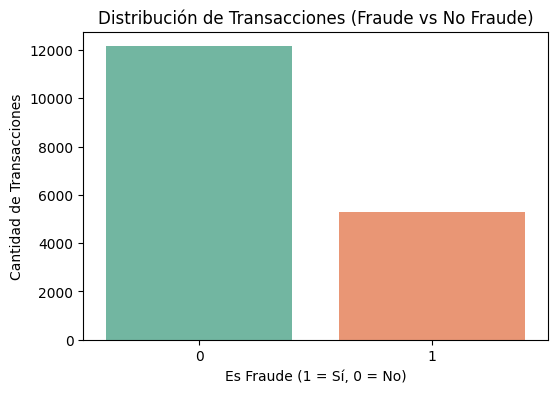

In [40]:
# Distribución de la variable objetivo
print("Distribución de la variable objetivo 'is_fraud':")
print(Data['is_fraud'].value_counts())
# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=Data, palette='Set2')
plt.title("Distribución de Transacciones (Fraude vs No Fraude)")
plt.xlabel("Es Fraude (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de Transacciones")
plt.show()

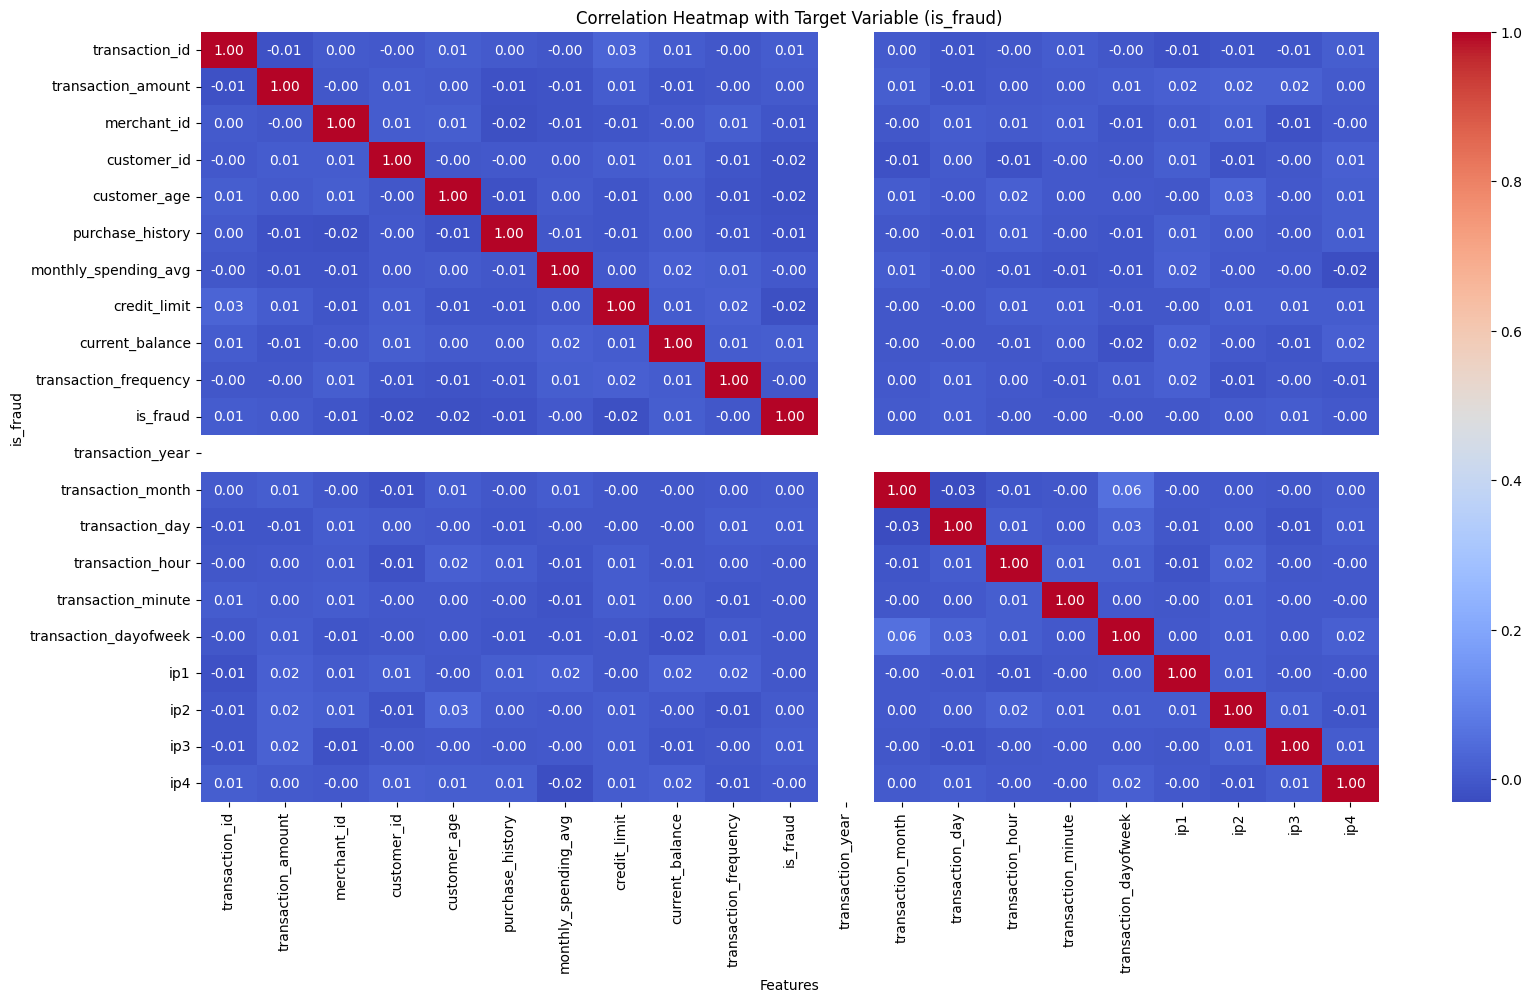

In [53]:
# Create a heatmap focusing on the target variable 'is_fraud'

Corr = Data.corr(numeric_only=True)
plt.figure(figsize=(19, 10))
sns.heatmap(Corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with Target Variable (is_fraud)')
plt.xlabel('Features')
plt.ylabel('is_fraud')
plt.show()

In [54]:
print(Data.columns)

Index(['transaction_id', 'transaction_amount', 'transaction_date',
       'transaction_type', 'merchant_location', 'currency', 'merchant_id',
       'merchant_category', 'payment_method', 'customer_id', 'customer_age',
       'customer_gender', 'purchase_history', 'monthly_spending_avg',
       'credit_limit', 'current_balance', 'ip_address', 'device_used',
       'transaction_frequency', 'is_fraud', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour',
       'transaction_minute', 'transaction_dayofweek', 'ip1', 'ip2', 'ip3',
       'ip4'],
      dtype='object')


In [63]:
col = (['transaction_amount','transaction_type','currency','payment_method', 'purchase_history', 'monthly_spending_avg',
       'credit_limit', 'current_balance', 'device_used',
       'transaction_frequency', 'is_fraud', 'transaction_hour', 'transaction_dayofweek', 'ip1'])
df_c = Data[col]
df_c.head()

,transaction_amount,transaction_type,currency,payment_method,purchase_history,monthly_spending_avg,credit_limit,current_balance,device_used,transaction_frequency,is_fraud,transaction_hour,transaction_dayofweek,ip1
0,100.000000,in_store,EUR,contactless,8,412.01,13047,1956.78,mobile,2,1,20,1,67
2,1000.000000,online,USD,chip,14,358.88,2724,6749.39,desktop,7,1,13,6,179
3,836.010919,withdrawal,USD,chip,6,236.92,7267,6945.33,mobile,2,0,3,4,129
4,54.179905,in_store,EUR,contactless,9,258.80,17564,18247.69,mobile,5,0,20,1,26
6,8495.724782,in_store,GBP,chip,11,466.17,1890,9912.68,desktop,4,0,9,5,10


In [68]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 0 to 19843
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_amount     17418 non-null  float64
 1   transaction_type       17418 non-null  object 
 2   currency               17418 non-null  object 
 3   payment_method         17418 non-null  object 
 4   purchase_history       17418 non-null  int64  
 5   monthly_spending_avg   17418 non-null  float64
 6   credit_limit           17418 non-null  int64  
 7   current_balance        17418 non-null  float64
 8   device_used            17418 non-null  object 
 9   transaction_frequency  17418 non-null  int64  
 10  is_fraud               17418 non-null  int64  
 11  transaction_hour       17418 non-null  int32  
 12  transaction_dayofweek  17418 non-null  int32  
 13  ip1                    17418 non-null  Int64  
dtypes: Int64(1), float64(3), int32(2), int64(4), object(4)
memo

In [74]:
from sklearn.preprocessing import LabelEncoder
# List of columns to encode
columns_to_encode = ['transaction_type', 'currency', 'payment_method', 'device_used']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    df_c[column] = label_encoder.fit_transform(df_c[column])

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\1236509484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[column] = label_encoder.fit_transform(df_c[column])
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\1236509484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[column] = label_encoder.fit_transform(df_c[column])
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\1236509484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [75]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 0 to 19843
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_amount     17418 non-null  float64
 1   transaction_type       17418 non-null  int64  
 2   currency               17418 non-null  int64  
 3   payment_method         17418 non-null  int64  
 4   purchase_history       17418 non-null  int64  
 5   monthly_spending_avg   17418 non-null  float64
 6   credit_limit           17418 non-null  int64  
 7   current_balance        17418 non-null  float64
 8   device_used            17418 non-null  int64  
 9   transaction_frequency  17418 non-null  int64  
 10  is_fraud               17418 non-null  int64  
 11  transaction_hour       17418 non-null  int32  
 12  transaction_dayofweek  17418 non-null  int32  
 13  ip1                    17418 non-null  Int64  
dtypes: Int64(1), float64(3), int32(2), int64(8)
memory usage: 1

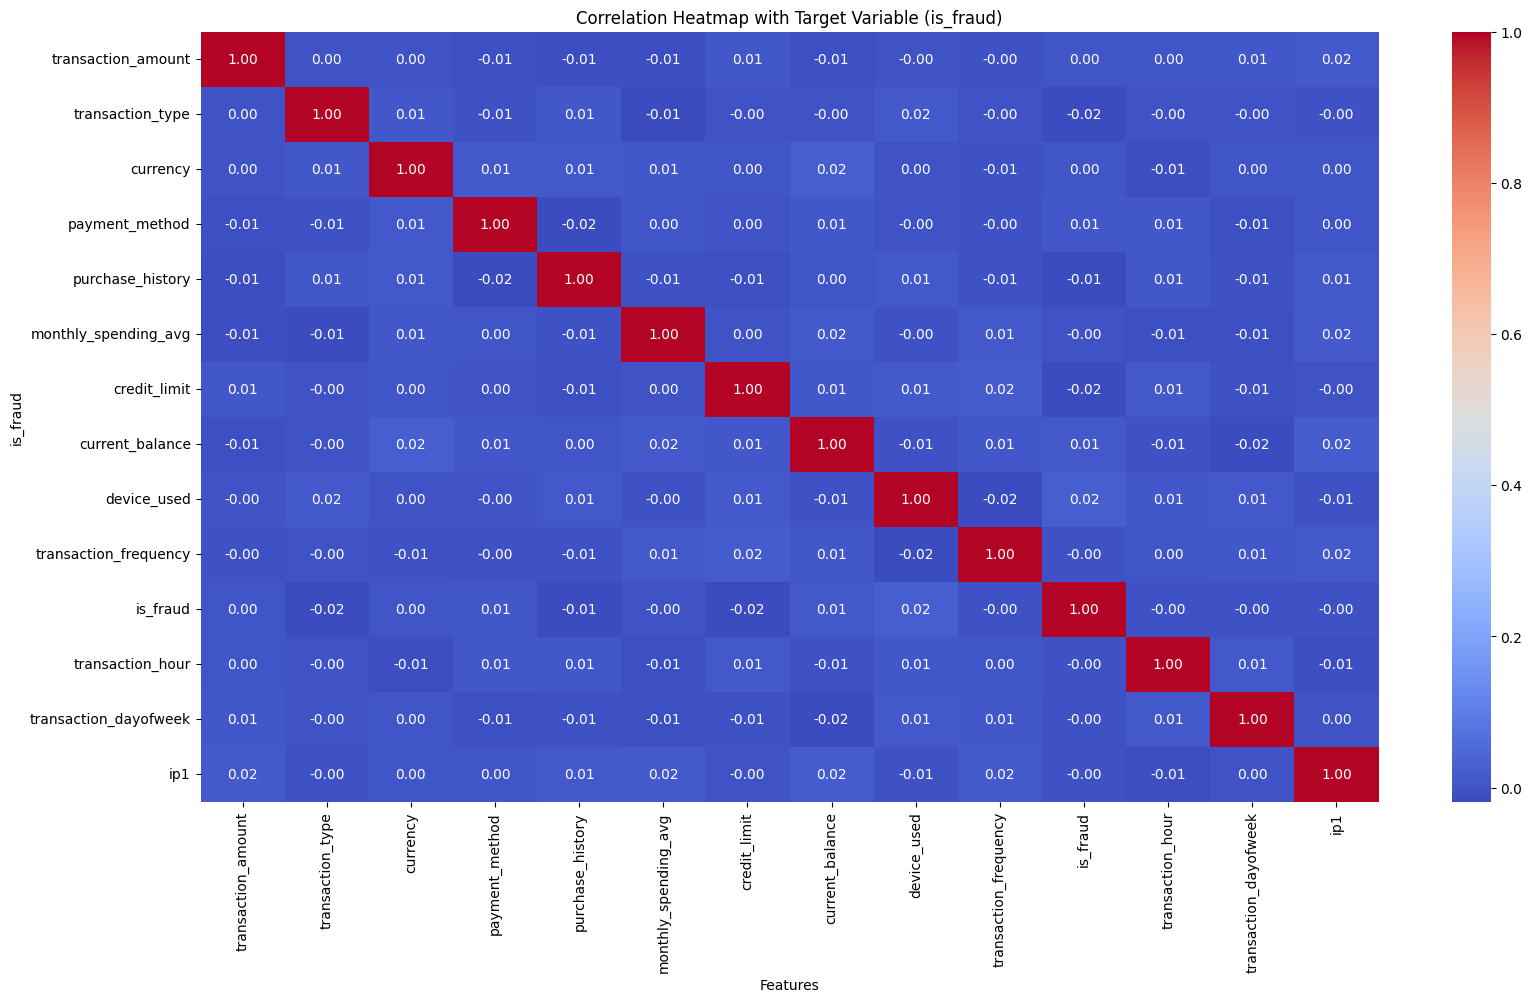

In [76]:
# Create a heatmap focusing on the target variable 'is_fraud' con variables seleccionadas 

Corr = df_c.corr(numeric_only=True)
plt.figure(figsize=(19, 10))
sns.heatmap(Corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with Target Variable (is_fraud)')
plt.xlabel('Features')
plt.ylabel('is_fraud')
plt.show()

In [79]:
numerical = ['transaction_amount', 'monthly_spending_avg', 'credit_limit']
scaler = StandardScaler()
df_c[numerical] = scaler.fit_transform(df_c[numerical])

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_67428\1286517590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[numerical] = scaler.fit_transform(df_c[numerical])


In [82]:
X = df_c.drop('is_fraud' , axis= 1)
y = df_c['is_fraud']

y

0        1
2        1
3        0
4        0
6        0
        ..
19839    1
19840    0
19841    0
19842    0
19843    0
Name: is_fraud, Length: 17418, dtype: int64

## Regresion logistica completar codigo 

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
print(model.coef_, model.intercept_)

[[ 1.52518074e-03 -8.49749931e-02  2.30581864e-02 -5.49732177e-03
  -1.04462232e-02 -9.98845025e-03 -4.66652344e-02  7.21067795e-06
   9.55627257e-02 -1.14415572e-05 -6.77753526e-04 -8.92168270e-03
  -1.77067795e-04]] [-0.8154403]


## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)